In [206]:
# Importing pandas for working with data
import pandas as pd

# Importing numpy for numerical operations
import numpy as np

# Importing matplotlib for making graphs
import matplotlib.pyplot as plt 

# Importing seaborn for pretty graphs
import seaborn as sns


In [208]:
# Loading the dataset from a CSV file
dataset = pd.read_csv('UberDataset.csv')


In [212]:
# Displaying the first 10 rows of the dataset
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [214]:
# Getting the number of rows and columns in the dataset
dataset.shape

(1156, 7)

In [216]:
# Displaying a summary of the dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


# Data Preprocessing

In [218]:
# Fill missing values in the 'PURPOSE' column with 'NOT'
dataset['PURPOSE'].fillna("NOT", inplace=True)

C:\Users\nrarv\AppData\Local\Temp\ipykernel_29704\825249651.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dataset['PURPOSE'].fillna("NOT", inplace=True)


In [220]:
# Displaying the first 10 rows of the dataset
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NOT
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [224]:
# Convert 'START_DATE' column to datetime format
# This line changes the 'START_DATE' entries into a date and time format,
# handling any errors by setting problematic entries to NaT (Not a Time)
# 'coerce' means to force any invalid date entries to NaT (Not a Time)
dataset['START_DATE'] = pd.to_datetime(dataset['START_DATE'], errors='coerce')

# Convert 'END_DATE' column to datetime format
# This line changes the 'END_DATE' entries into a date and time format,
# handling any errors by setting problematic entries to NaT (Not a Time)
# 'coerce' means to force any invalid date entries to NaT (Not a Time)
dataset['END_DATE'] = pd.to_datetime(dataset['END_DATE'], errors='coerce')



In [226]:
# Display information about the dataset
# This includes the number of entries, column names, non-null counts, and data types
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  421 non-null    datetime64[ns]
 1   END_DATE    420 non-null    datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1156 non-null   float64       
 6   PURPOSE     1156 non-null   object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


#  Additional Column Add date - time  format  

In [228]:
from datetime import datetime

# Extract date from 'START_DATE' column
# This line creates a new column 'date' with only the date part from 'START_DATE'
dataset['date'] = pd.DatetimeIndex(dataset['START_DATE']).date

# Extract hour from 'START_DATE' column
# This line creates a new column 'time' with only the hour part from 'START_DATE'
dataset['time'] = pd.DatetimeIndex(dataset['START_DATE']).hour


In [230]:
# Show the first 10 rows of the dataset
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17.0
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13.0
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8.0
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12.0


# Divide In Category

In [232]:
# Create 'day_night' column to categorize time into parts of the day
# This line divides the 'time' column into bins and labels them as 'Morning', 'AfterNoon', 'Evening', and 'Night'
# 'pd.cut' is used to segment and sort data values into bins
# 'x = dataset' means we're using the 'time' column from the 'dataset' DataFrame
# 'bins' is the range of values for each part of the day
dataset['day_night'] = pd.cut(x=dataset['time'], bins=[0, 10, 15, 19, 24], labels=['Morning', 'AfterNoon', 'Evening', 'Night'])


In [234]:
# Show the first 10 rows of the dataset
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AfterNoon
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17.0,Evening
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13.0,AfterNoon
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8.0,Morning
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12.0,AfterNoon


# Drop Null Values In Dataset 

In [236]:
# Remove rows with missing values from the dataset
# 'inplace=True' means the changes are made directly to the original dataset
dataset.dropna(inplace=True)

In [238]:
# Get the number of rows and columns in the dataset
dataset.shape

(413, 10)

   # Data Visualization

# In which category do people book the most Uber rides ?

([0, 1], [Text(0, 0, 'Business'), Text(1, 0, 'Personal')])

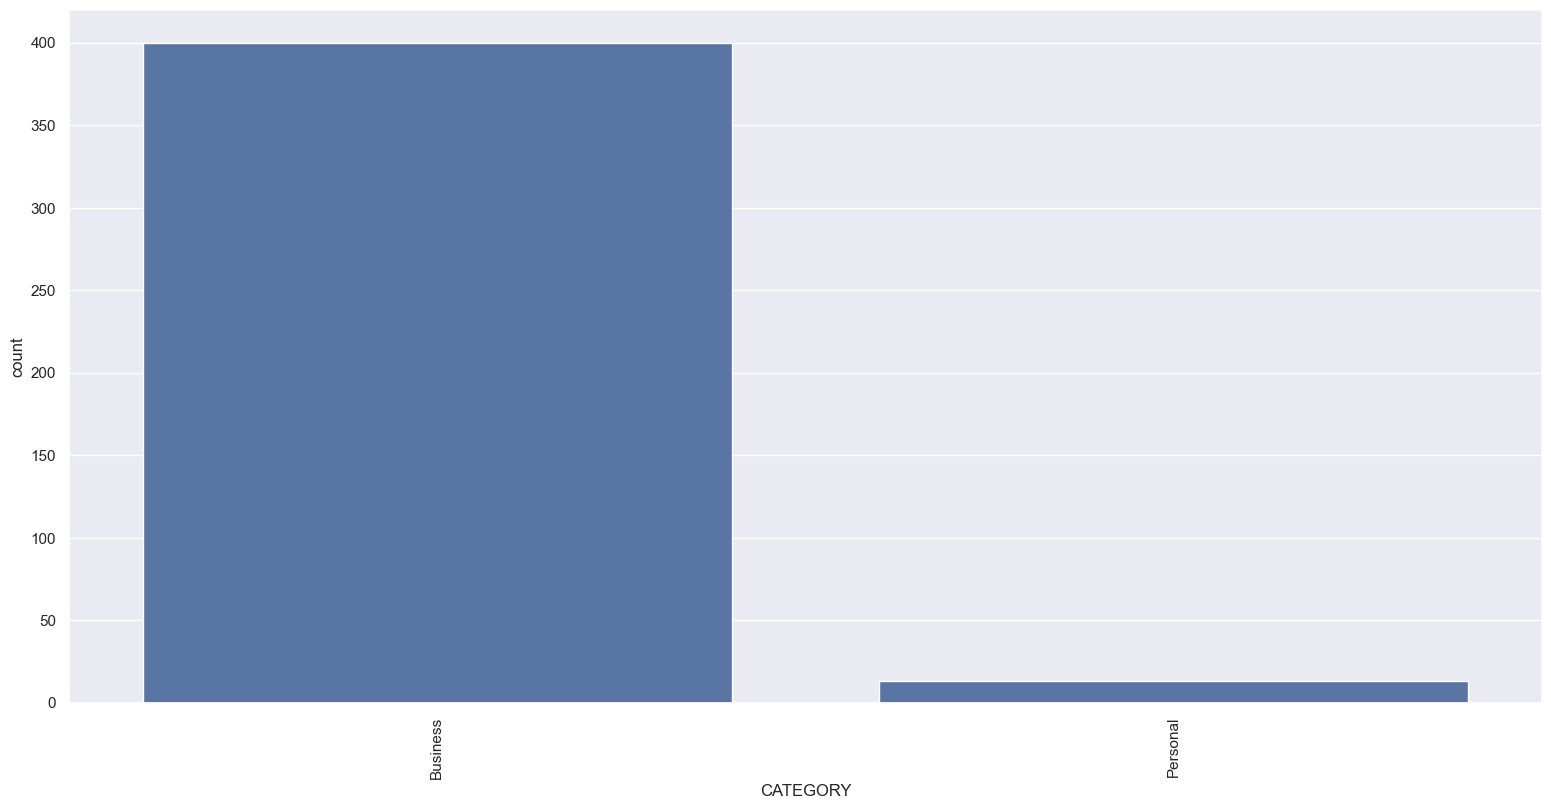

In [244]:
# Set the size of the entire plot
plt.figure(figsize=(19, 9))

# Use plt.plot to create a plot
# Use plt.subplot(1,2,1) to create subplots when using 2 plots together
# plt.subplot(1,2,1) means 1 row, 2 columns, this is the 1st plot
# plt.subplot(1,2,2) would mean 1 row, 2 columns, this is the 2nd plot

# Create a count plot for the 'CATEGORY' column in the dataset
sns.countplot(x=dataset['CATEGORY'])

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# For which purpose do people book Uber rides the most?

([0, 1, 2, 3, 4, 5, 6],
 [Text(0, 0, 'Meal/Entertain'),
  Text(1, 0, 'NOT'),
  Text(2, 0, 'Errand/Supplies'),
  Text(3, 0, 'Meeting'),
  Text(4, 0, 'Customer Visit'),
  Text(5, 0, 'Temporary Site'),
  Text(6, 0, 'Between Offices')])

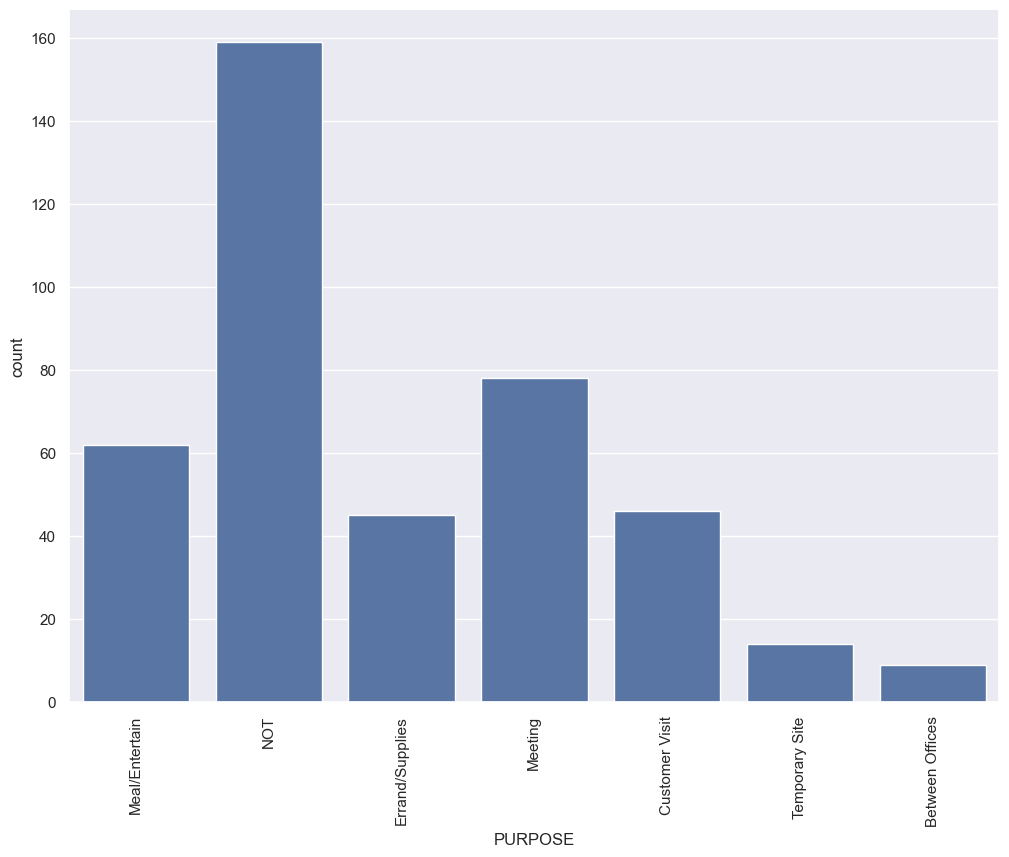

In [246]:
# Set the size of the plot
plt.figure(figsize=(12, 9))

# Create a count plot for the 'PURPOSE' column in the dataset 
# This will show the frequency of each unique value in 'PURPOSE'
sns.countplot(x=dataset['PURPOSE'])

# Rotate the x-axis labels by 90 degrees for better readability
plt.xticks(rotation=90)

# At what time do people book cabs the most from Uber?

<Axes: xlabel='day_night', ylabel='count'>

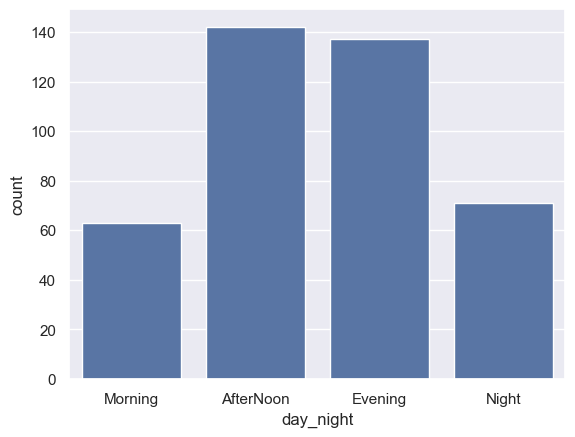

In [248]:
# Create a count plot for the 'day_night' column in the dataset
# This will show the frequency of each part of the day (Morning, AfterNoon, Evening, Night)
sns.countplot(x=dataset['day_night'])

# Additional Column Add date - time  format  

In [250]:
# Extract the month from 'START_DATE' column and create a new column 'MONTH'
# 'pd.DatetimeIndex' is used to access datetime properties of 'START_DATE'
dataset['MONTH'] = pd.DatetimeIndex(dataset['START_DATE']).month
# This line gets the month part from 'START_DATE'

# Create a dictionary to map month numbers to month names
month_label = {1.0: 'Jan', 2.0: 'Feb', 3.0: 'Mar', 4.0: 'April',
               5.0: 'May', 6.0: 'June', 7.0: 'July', 8.0: 'Aug',
               9.0: 'Sep', 10.0: 'Oct', 11.0: 'Nov', 12.0: 'Dec'}
# This dictionary assigns names to month numbers

# Replace the number month with the string name in the 'MONTH' column
dataset["MONTH"] = dataset.MONTH.map(month_label)

# Calculate the count for each month
mon = dataset.MONTH.value_counts(sort=False)
# This line counts how many times each month appears in the 'MONTH' column


In [252]:
# Show the first 10 rows of the dataset
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,MONTH
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,2016-01-01,21.0,Night,Jan
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,2016-01-02,1.0,Morning,Jan
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,2016-01-02,20.0,Night,Jan
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,2016-01-05,17.0,Evening,Jan
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2016-01-06,14.0,AfterNoon,Jan
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2016-01-06,17.0,Evening,Jan
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2016-01-06,17.0,Evening,Jan
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,2016-01-07,13.0,AfterNoon,Jan
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,2016-01-10,8.0,Morning,Jan
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,2016-01-10,12.0,AfterNoon,Jan


# In which months do people book Uber rides less frequently?

[Text(0.5, 0, 'MONTHS'), Text(0, 0.5, 'VALUE COUNT')]

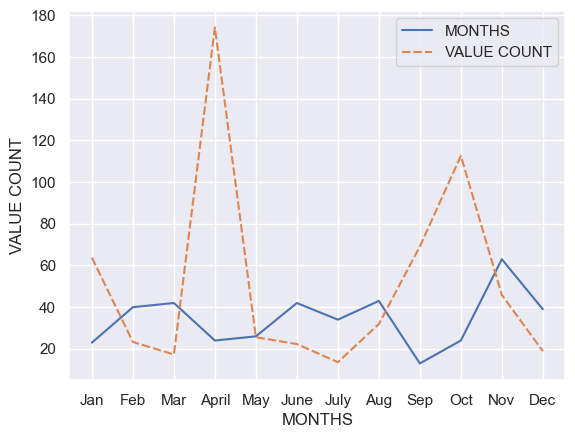

In [254]:
# Create a new DataFrame 'df' with 'MONTHS' and 'VALUE COUNT' columns
df = pd.DataFrame({
    "MONTHS": mon.values,  # Values from the 'mon' variable (count for each month)
    "VALUE COUNT": dataset.groupby("MONTH", sort=False)["MILES"].max()  # Maximum 'MILES' for each month
    # 'dataset.groupby("MONTH")' groups the dataset by the 'MONTH' column
    # 'sort=False' keeps the original order of the months
    # '["MILES"].max()' calculates the maximum value of 'MILES' for each month
})

# Create a line plot using seaborn with the 'df' DataFrame
p = sns.lineplot(data=df)

# Set labels for the x and y axes
p.set(xlabel="MONTHS", ylabel="VALUE COUNT")


In [256]:
# Extract the day of the week from 'START_DATE' column and create a new column 'DAY'
dataset["DAY"] = dataset.START_DATE.dt.weekday
# This line gets the weekday part from 'START_DATE', where 0 is Monday and 6 is Sunday

# Create a dictionary to map weekday numbers to weekday names
day_label = {0: "Mon", 1: "Tue", 2: "Wed", 3: "Thu", 4: "Fri", 5: "Sat", 6: "Sun"}
# This dictionary assigns names to weekday numbers

# Replace the weekday number with the weekday name in the 'DAY' column
# .map is used to replace the values in the 'DAY' column with corresponding names from 'day_label'
dataset['DAY'] = dataset['DAY'].map(day_label)


In [152]:
dataset.head(10)

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,date,time,day_night,MONTH,DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,4,21.0,Night,Jan,Fri
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NOT,5,1.0,Morning,Jan,Sat
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,5,20.0,Night,Jan,Sat
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,17.0,Evening,Jan,Tue
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,14.0,AfterNoon,Jan,Wed
5,2016-01-06 17:15:00,2016-01-06 17:19:00,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain,2,17.0,Evening,Jan,Wed
6,2016-01-06 17:30:00,2016-01-06 17:35:00,Business,West Palm Beach,Palm Beach,7.1,Meeting,2,17.0,Evening,Jan,Wed
7,2016-01-07 13:27:00,2016-01-07 13:33:00,Business,Cary,Cary,0.8,Meeting,3,13.0,AfterNoon,Jan,Thu
8,2016-01-10 08:05:00,2016-01-10 08:25:00,Business,Cary,Morrisville,8.3,Meeting,6,8.0,Morning,Jan,Sun
9,2016-01-10 12:17:00,2016-01-10 12:44:00,Business,Jamaica,New York,16.5,Customer Visit,6,12.0,AfterNoon,Jan,Sun


# On which days of the week do people book Uber rides the most?

Text(0, 0.5, 'COUNT')

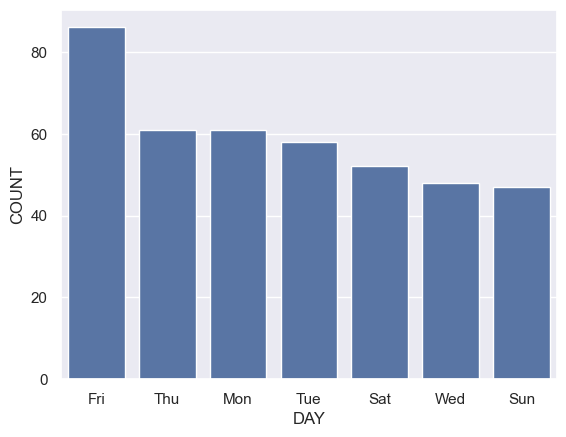

In [258]:
# Calculate the count of each day in the 'DAY' column
day_label = dataset.DAY.value_counts()

# Create a bar plot using seaborn with the count of each day
sns.barplot(x=day_label.index, y=day_label)

# Set labels for the x and y axes
plt.xlabel("DAY")
plt.ylabel("COUNT")

# How many miles do people usually book a cab for through Uber?

<Axes: ylabel='MILES'>

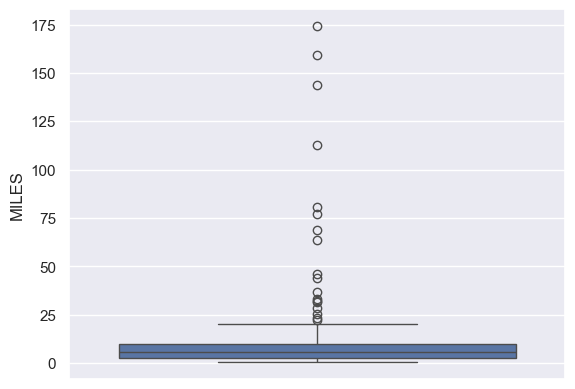

In [264]:
# Create a box plot using seaborn for the 'MILES' column in the dataset
sns.boxplot(dataset["MILES"])

<Axes: ylabel='MILES'>

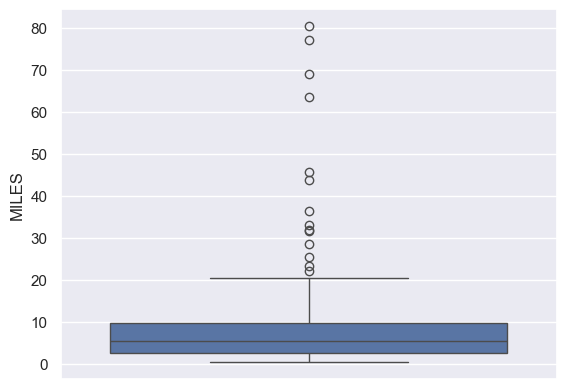

In [266]:
# Create a box plot using seaborn for the 'MILES' column in the dataset
# This only includes rows where 'MILES' is less than 100

sns.boxplot(dataset[dataset["MILES"]< 100] ["MILES"])

<Axes: ylabel='MILES'>

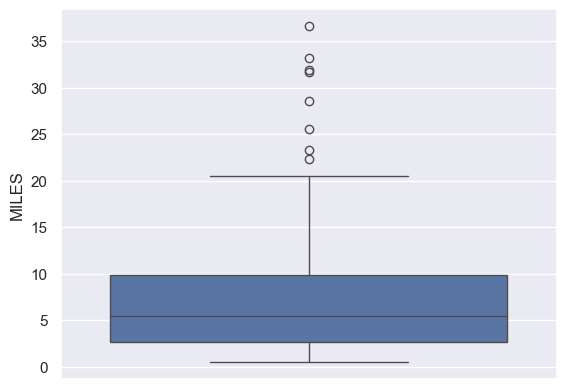

In [270]:
# Create a box plot using seaborn for the 'MILES' column in the dataset
# This only includes rows where 'MILES' is less than 40

sns.boxplot(dataset[dataset["MILES"] <40] ["MILES"])

C:\Users\nrarv\AppData\Local\Temp\ipykernel_29704\1161969215.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset[dataset["MILES"] <40] ["MILES"])


<Axes: xlabel='MILES', ylabel='Density'>

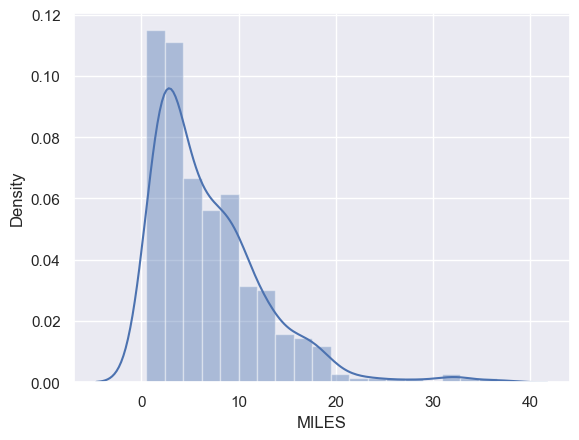

In [272]:
# Create a distribution plot using seaborn for the 'MILES' column in the dataset
# This only includes rows where 'MILES' is less than 40
sns.distplot(dataset[dataset["MILES"] <40] ["MILES"])

<Axes: xlabel='MILES', ylabel='Count'>

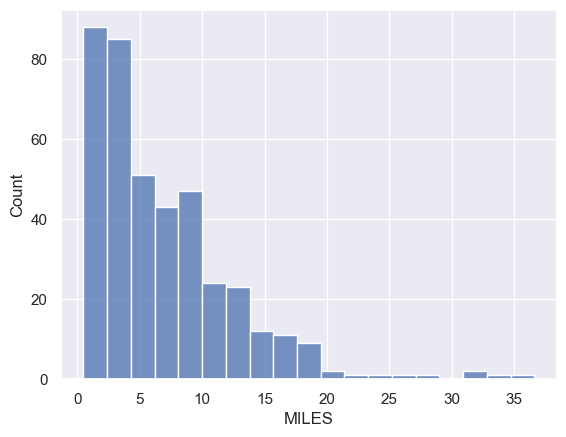

In [276]:
# Create a histogram using seaborn for the 'MILES' column in the dataset
# This only includes rows where 'MILES' is less than 40
sns.histplot(dataset[dataset["MILES"] <40] ["MILES"])